# Explore here

In [2]:
# Your code here
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [3]:
# Leemos el csv con el head para que nos devuelva las 5 primeras líneas de df
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Miramos el rango que tiene el df para valorar los siguientes pasos
df.shape

(768, 9)

In [5]:
# Buscamos si el df tiene valores duplicados, si es así los eliminamos
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

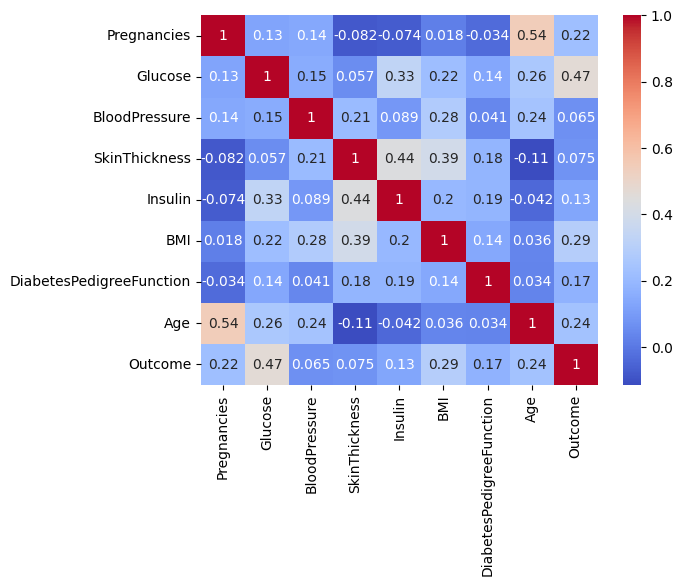

In [7]:
# Utilizamos la gráfica de la libreria seaborn para ver la correlación entre los valores del df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x600 with 0 Axes>

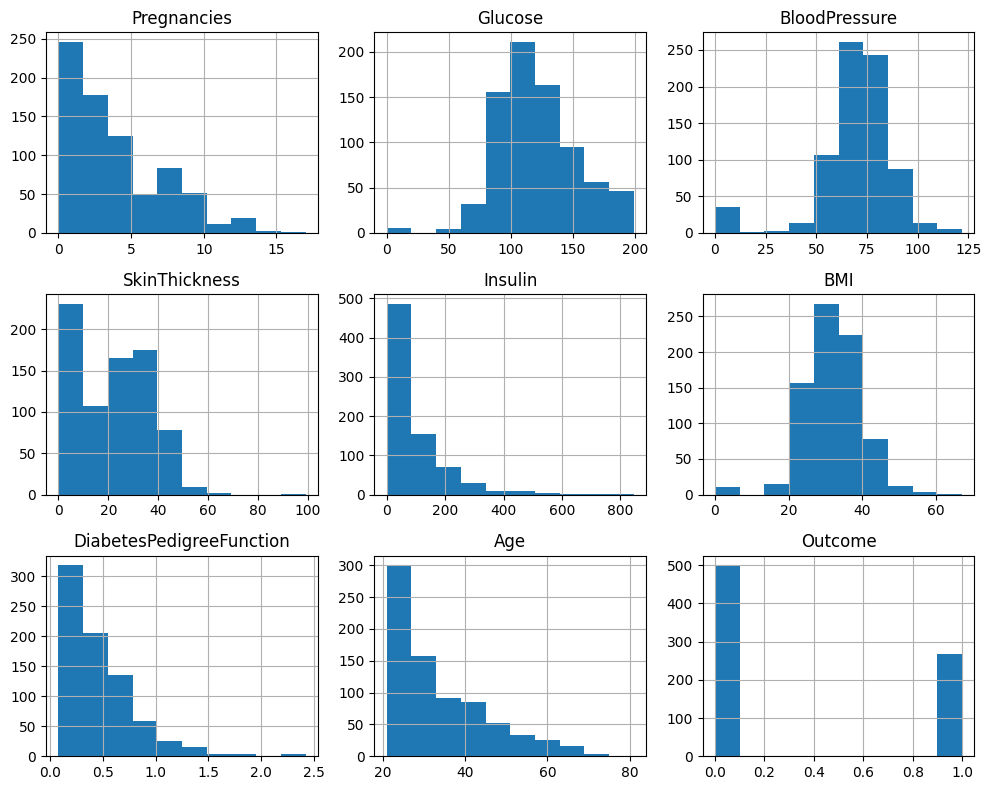

In [8]:
plt.figure(figsize=(10,6))
df.hist(bins=10, figsize=(10, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Creamos un árbol complejo y uno simple
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=42).fit(X_train, y_train)
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)

# Aplicamos los árboles sobre los datos de entrenamiento y de test
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

In [12]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [13]:
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


In [14]:
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


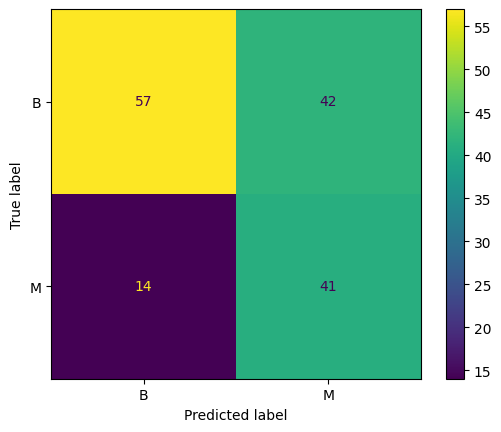

In [15]:
cm = confusion_matrix(y_test, test_pred_simple)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
disp.plot()

In [16]:
text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Age <= 28.50
|   |--- Glucose <= 127.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 1
|--- Age >  28.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 142.00
|   |   |   |--- class: 1
|   |   |--- Insulin >  142.00
|   |   |   |--- class: 1



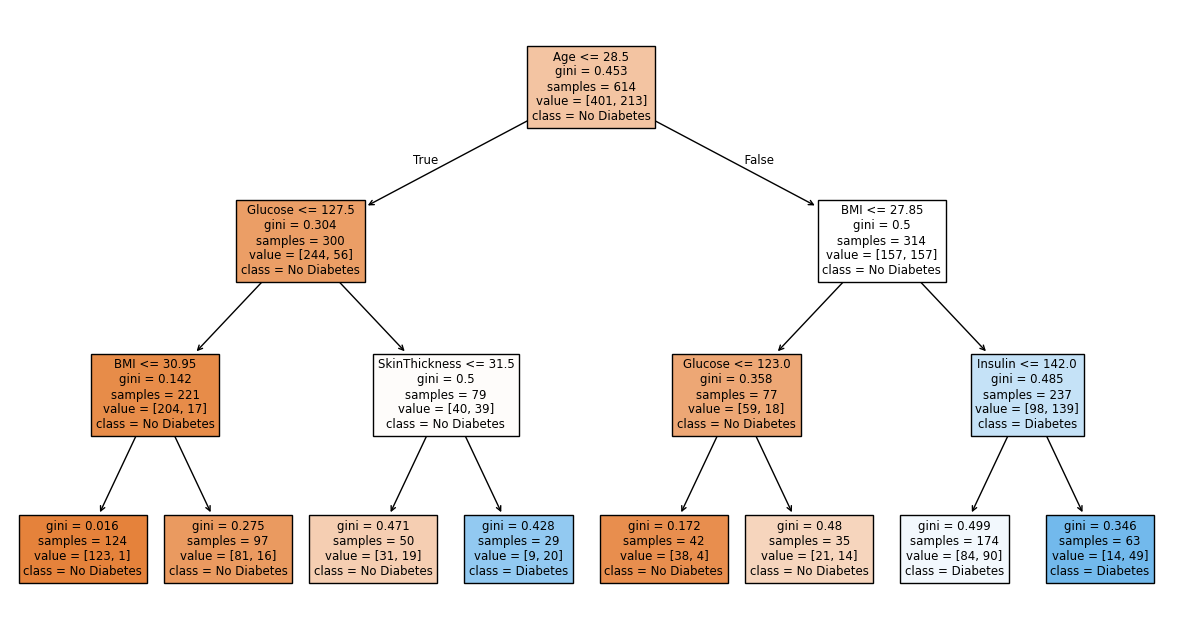

In [17]:
plt.figure(figsize=(15, 8))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['No Diabetes','Diabetes'], filled=True)
plt.show()

In [18]:
# El árbol indica que la edad, los niveles de glucosa, el BMI y la insulina son factores clave para determinar el riesgo de diabetes. 
# Sin embargo, algunas divisiones tienen alta incertidumbre (gini alto), lo que sugiere que podrían necesitarse más datos o un modelo más complejo para mejorar la predicción.
# La primera división se hace en 28.5 años, lo que sugiere que la edad es un factor clave en la probabilidad de tener diabetes.
#Si la persona tiene más de 28.5 años, se analizan el IMC (BMI), glucosa e insulina.
#Para personas jóvenes (≤ 28.5 años), un nivel de glucosa ≤ 127.5 está más asociado a no diabetes, mientras que niveles mayores requieren más análisis.
#En personas mayores, la glucosa también se usa para dividir los casos, mostrando su importancia en la predicción.
#Para personas mayores de 28.5 años, un BMI ≤ 27.85 no es suficiente para predecir la diabetes por sí solo (gini = 0.5, indicando mucha incertidumbre).
#En casos con BMI alto, el nivel de insulina ≤ 142 ayuda a determinar la probabilidad de tener diabetes.

Mejores Hiperparámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mejor Precisión: 0.73
Accuracy del Mejor Modelo: 0.77
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



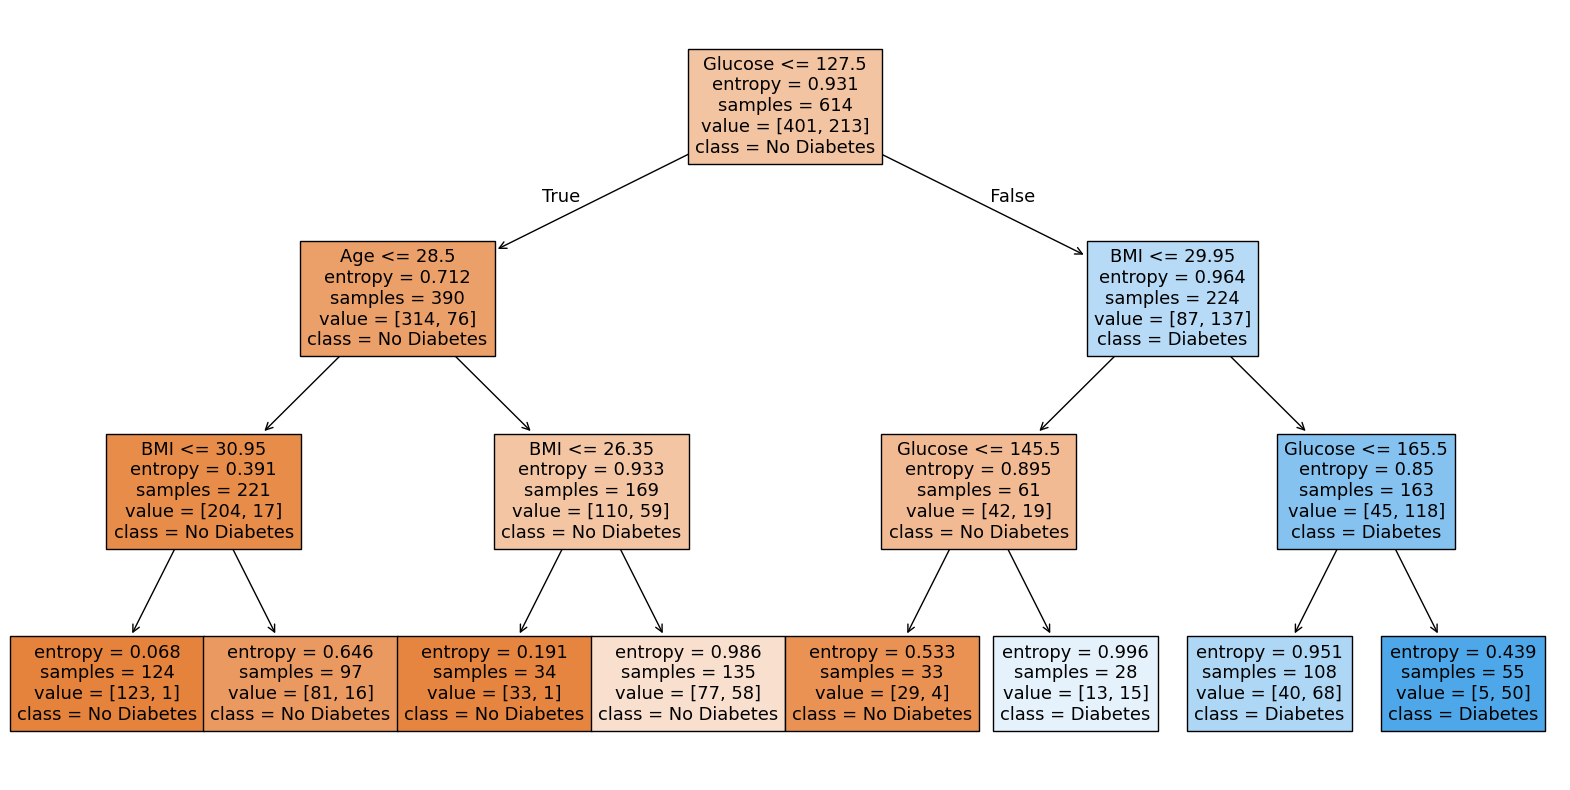

In [19]:
# Paso 4: Optimización con GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(max_depth=4,random_state=42), param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"Mejor Precisión: {grid_search.best_score_:.2f}")

# Evaluación del mejor modelo
y_pred_best = best_model.predict(X_test)
print(f"Accuracy del Mejor Modelo: {accuracy_score(y_test, y_pred_best):.2f}")
print(classification_report(y_test, y_pred_best))

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [ ]:
#Gracias a la optimización con GridSearchCV, se ha obtenido un árbol de decisión más eficiente, con una mejor separación de clases y una estructura que evita el sobreajuste.
#El uso de la entropía ha permitido encontrar divisiones más informativas en ciertos nodos.
#La profundidad parece estar controlada para evitar sobreajuste, permitiendo una mejor generalización en datos nuevos.
#Se ha optimizado con valores como max_depth, min_samples_split y min_samples_leaf para mejorar la precisión.
#Glucosa sigue siendo el factor principal en la decisión, con un umbral de 127.5.
#Luego, la edad (≤ 28.5 años) es un factor clave en personas con glucosa baja.
#Para personas con glucosa alta, el IMC (BMI) y la glucosa en niveles superiores son relevantes para distinguir entre diabetes y no diabetes